In [4]:
import pandas as pd
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
rawdata = pd.read_csv('cryptocurrency.csv')

In [6]:
rawdata

,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-09-26 14:35:12,Dogecoin,DOGE,0.223351,$4.20B,1.85%,-4.13%,-18.45%,$33.56B
1,2025-09-26 14:35:12,BNB,BNB,936.1,$4.72B,1.92%,-4.94%,-5.58%,$129.98B
2,2025-09-26 14:35:12,USDC,USDC,0.9993,$25.08B,10.84%,-0.02%,-0.02%,$73.85B
3,2025-09-26 14:35:12,Ethereum,ETH,"3,891.64",$61.10B,27.96%,-2.99%,-14.16%,$468.60B
4,2025-09-26 14:35:12,XRP,XRP,2.7079,$9.25B,3.76%,-3.94%,-10.76%,$161.66B
...,...,...,...,...,...,...,...,...,...
97841,2025-03-17 00:34:14,TRON,TRX,0.212986,$587.69M,1.03%,-4.03%,-9.58%,$20.23B
97842,2025-03-17 00:34:14,Stellar,XLM,0.2661,$153.80M,0.27%,-3.95%,-0.94%,$8.15B
97843,2025-03-17 00:34:14,XRP,XRP,2.3201,$3.85B,6.82%,-4.14%,+6.16%,$134.52B
97844,2025-03-17 00:34:14,USDC,USDC,1,$5.16B,8.43%,+0.01%,+0.00%,$58.72B


In [7]:
rawdata.set_index(rawdata['timestamp'], inplace = True)

In [8]:
del rawdata['timestamp']

In [9]:
rawdata

,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
timestamp,,,,,,,,
2025-09-26 14:35:12,Dogecoin,DOGE,0.223351,$4.20B,1.85%,-4.13%,-18.45%,$33.56B
2025-09-26 14:35:12,BNB,BNB,936.1,$4.72B,1.92%,-4.94%,-5.58%,$129.98B
2025-09-26 14:35:12,USDC,USDC,0.9993,$25.08B,10.84%,-0.02%,-0.02%,$73.85B
2025-09-26 14:35:12,Ethereum,ETH,"3,891.64",$61.10B,27.96%,-2.99%,-14.16%,$468.60B
2025-09-26 14:35:12,XRP,XRP,2.7079,$9.25B,3.76%,-3.94%,-10.76%,$161.66B
...,...,...,...,...,...,...,...,...
2025-03-17 00:34:14,TRON,TRX,0.212986,$587.69M,1.03%,-4.03%,-9.58%,$20.23B
2025-03-17 00:34:14,Stellar,XLM,0.2661,$153.80M,0.27%,-3.95%,-0.94%,$8.15B
2025-03-17 00:34:14,XRP,XRP,2.3201,$3.85B,6.82%,-4.14%,+6.16%,$134.52B


In [10]:
import pandas as pd
import numpy as np

def convertir_valor(valor):
    if pd.isna(valor):
        return np.nan

    s = str(valor).strip()
    # quitar símbolos comunes
    s = s.replace("$", "").replace(",", "").replace("%", "").replace("T", "").strip()

    # valores no válidos
    if s in ("", "-", "—", "N/A", "na", "NA"):
        return np.nan

    # procesar sufijos
    if "B" in s:
        return float(s.replace("B", "")) * 1000   # Billions → millones
    elif "M" in s:
        return float(s.replace("M", ""))          # Millions → millones
    elif "K" in s:
        return float(s.replace("K", "")) / 1000   # Thousands → millones
    elif "T" in s:
        return float(s.replace("T", "")) * 1000000   # Trillions → trillones
    else:
        return float(s)   # número normal o porcentaje ya limpio

def limpiar_dataframe(df):
    df_limpio = df.copy()
    for col in df_limpio.columns:
        try:
            df_limpio[col] = df_limpio[col].apply(convertir_valor)
        except Exception:
            # si la columna no es convertible (ej. texto puro como "name" o "symbol"),
            # simplemente la dejamos igual
            pass
    return df_limpio





In [11]:
# Supongamos que tu dataframe original es rawdata
df_limpio = limpiar_dataframe(rawdata)

display(df_limpio)


,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
timestamp,,,,,,,,
2025-09-26 14:35:12,Dogecoin,DOGE,0.223351,4200.00,1.85,-4.13,-18.45,33560.0
2025-09-26 14:35:12,BNB,BNB,936.100000,4720.00,1.92,-4.94,-5.58,129980.0
2025-09-26 14:35:12,USDC,USDC,0.999300,25080.00,10.84,-0.02,-0.02,73850.0
2025-09-26 14:35:12,Ethereum,ETH,3891.640000,61100.00,27.96,-2.99,-14.16,468600.0
2025-09-26 14:35:12,XRP,XRP,2.707900,9250.00,3.76,-3.94,-10.76,161660.0
...,...,...,...,...,...,...,...,...
2025-03-17 00:34:14,TRON,TRX,0.212986,587.69,1.03,-4.03,-9.58,20230.0
2025-03-17 00:34:14,Stellar,XLM,0.266100,153.80,0.27,-3.95,-0.94,8150.0
2025-03-17 00:34:14,XRP,XRP,2.320100,3850.00,6.82,-4.14,6.16,134520.0


In [12]:
from influxdb_client import InfluxDBClient

ModuleNotFoundError: No module named 'influxdb_client'

In [ ]:
my_token = 'EQolCCNk54UW7KMIgsvBxQOqEbPHEOYX0kkF4dSELnmqLMFWlUd6SPXxcY0-bSvQaW8feuK0cWeIt6qaKZpDyg=='

In [ ]:
client = InfluxDBClient(url = "http://localhost:8086", token = my_token, org = "somorrostro")

In [ ]:
write_client = client.write_api()

In [ ]:
write_client.write("prueba_crypto", record = df_limpio, data_frame_measurement_name = "criptomoneda", data_frame_tag_columns=["name"])

## GRÁFICOS SEABORN

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Si el índice se llama 'timestamp' o contiene fechas
if df_limpio.index.name == 'timestamp' or 'timestamp' not in df_limpio.columns:
    df_limpio = df_limpio.reset_index()   # convierte el índice en columna 'timestamp'

# 1) Asegúrate de tener df_limpio
# print(df_limpio.head())

# 2) Normalizar nombres de columnas (quita espacios y pasa a minúsculas)
df = df_limpio.rename(columns=lambda c: str(c).strip().lower())

# 3) Intentar identificar la columna de tiempo entre opciones comunes
possible_time_cols = ['timestamp', 'time', 'date', 'datetime', 'created_at', 'ts', 'fecha']
time_col = next((c for c in possible_time_cols if c in df.columns), None)

if time_col is None:
    raise KeyError("No se encontró ninguna columna de fecha/tiempo. Columnas disponibles: " + ", ".join(df.columns))

# 4) Convertir a datetime con coerción (invalidos -> NaT)
df[time_col] = pd.to_datetime(df[time_col], errors='coerce', utc=False)

# 5) Eliminar filas sin fecha válida
df = df.dropna(subset=[time_col])

# 6) Crear columna YYYY-MM (fecha_ym)
df['fecha_ym'] = df[time_col].dt.to_period('M').astype(str)

# 7) Fecha límite 5 meses atrás (desde ahora)
fecha_limite = pd.Timestamp.now() - pd.DateOffset(months=5)
df_5m = df[df[time_col] >= fecha_limite]

# 8) Filtrar top5 (asegúrate del nombre exacto de la columna 'name' o 'moneda')
name_col = 'name' if 'name' in df.columns else next((c for c in ['moneda','symbol','asset'] if c in df.columns), None)
if name_col is None:
    raise KeyError("No se encontró columna 'name' ni alternativa. Columnas: " + ", ".join(df.columns))

top5_valiosas = ["Bitcoin", "Ethereum", "Solana", "BNB", "Tether", "Tether USDT", "Tether USDt"]
df_top5_valiosas = df_5m[df_5m[name_col].isin(top5_valiosas)]

print("Criptomonedas incluidas:", df_top5_valiosas[name_col].unique())
print("Desde:", df_top5_valiosas[time_col].min(), "hasta:", df_top5_valiosas[time_col].max())


Criptomonedas incluidas: ['BNB' 'Ethereum' 'Bitcoin' 'Solana' 'Tether USDt']
Desde: 2025-05-14 06:34:15 hasta: 2025-09-26 14:35:12


In [14]:
# Si quieres usar solo las filas de df_top5_valiosas, crea ese DataFrame filtrado
top5 = ["Bitcoin","Ethereum","Solana","BNB","Tether"]
df_top5 = df[df['name'].isin(top5)].copy()

# Grafico 1
El eje X muestra el tiempo (fechas), el eje Y el precio en USD y cada color corresponde a una criptomoneda distinta; cada punto representa una observación de precio en una fecha determinada.


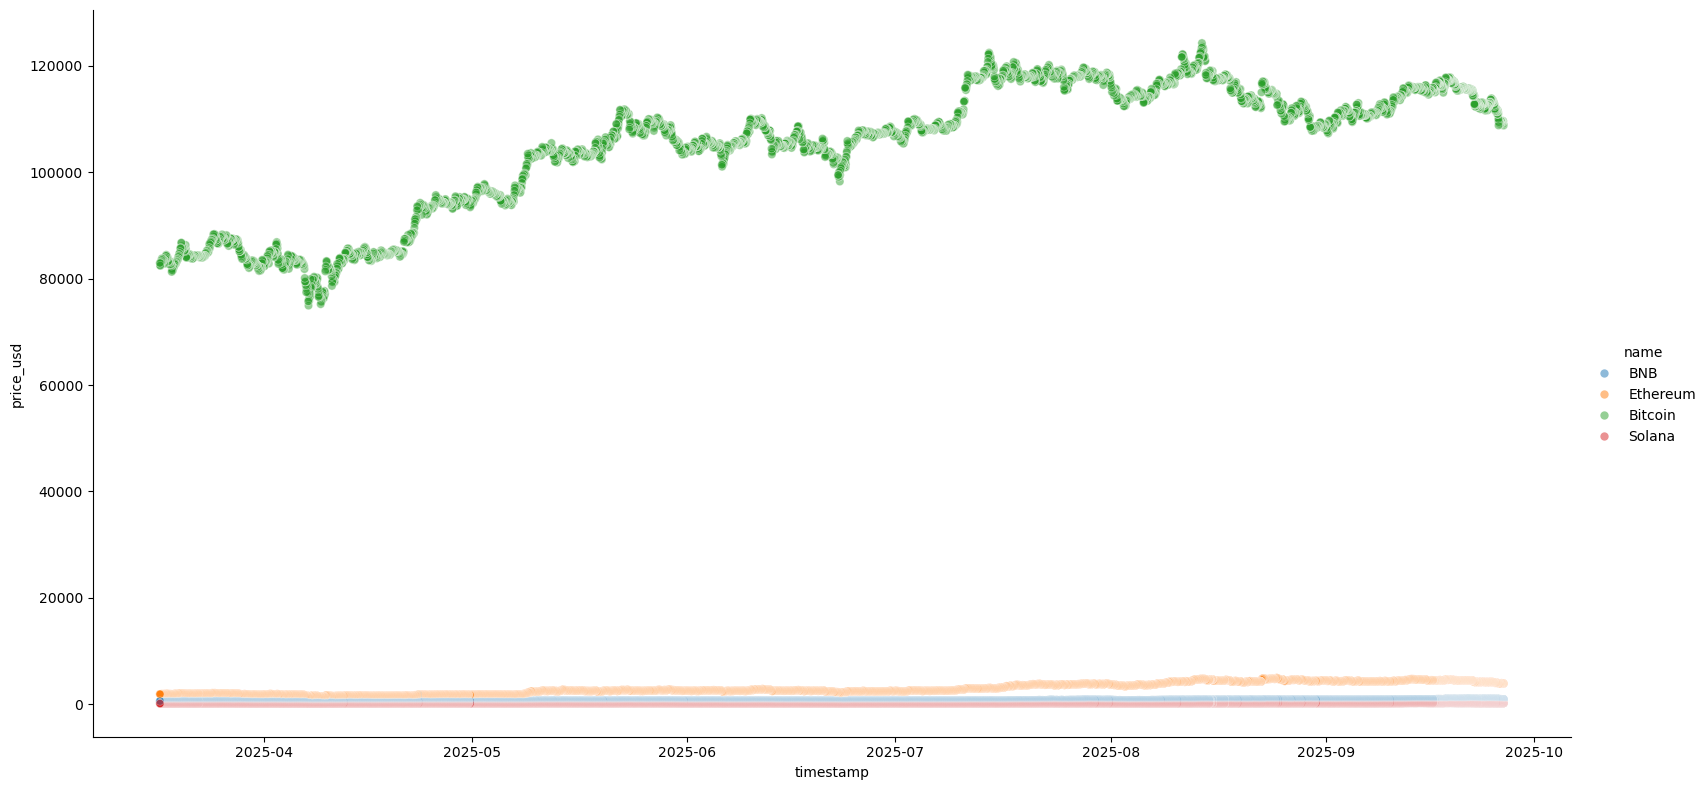

In [ ]:
sns.relplot(data=df_top5, x="timestamp", y="price_usd", hue="name",
            height=8, aspect=2, alpha=.5, legend='full');

# Gráfico 2
Muestra la evolución temporal de la capitalización de mercado mediana, es decir, es el valor total de una criptomoneda: precio actual multiplicado por todas las monedas que existen.




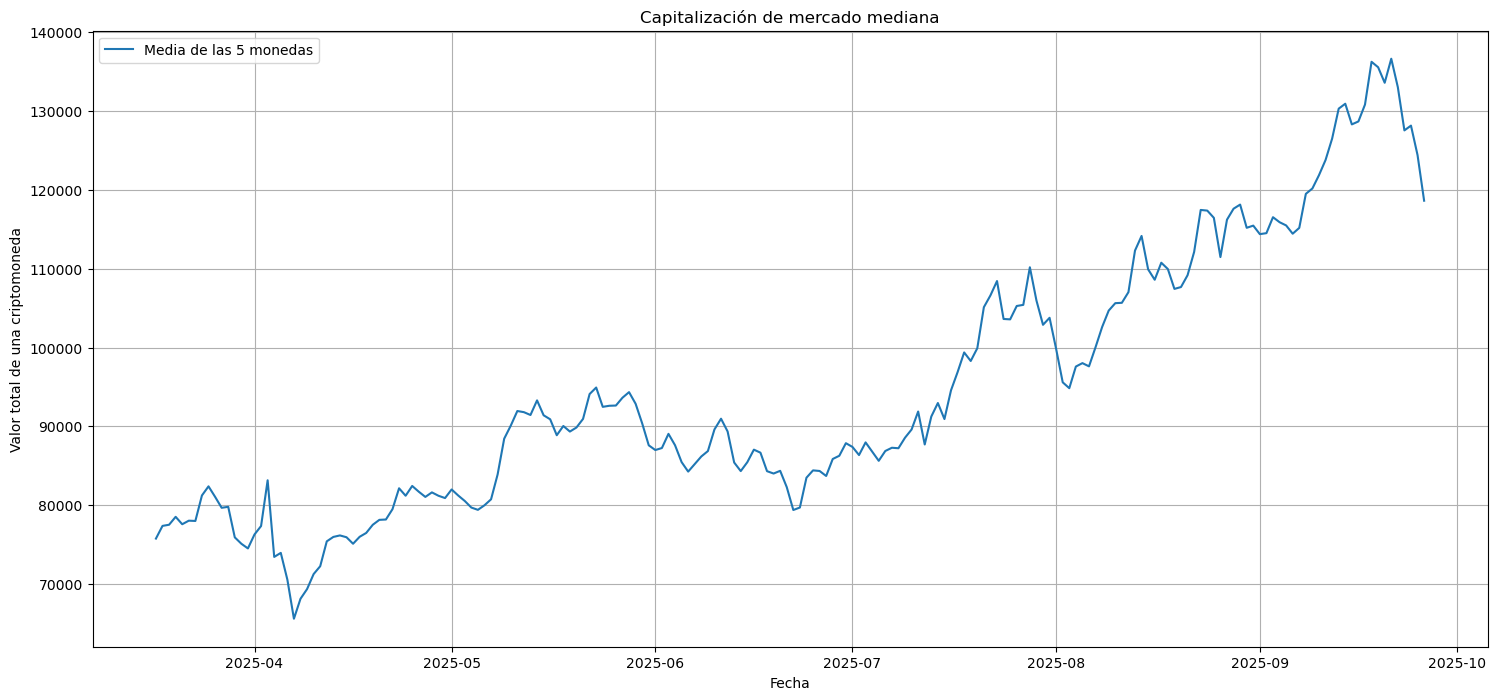

In [ ]:
df1 = df_top5.set_index('timestamp').resample('D')['market_cap'].median().rename('market_cap').reset_index()

fig, ax = plt.subplots(figsize=(18, 8))
sns.lineplot(data=df1, x='timestamp', y='market_cap', ax=ax, label='Media de las 5 monedas')

# Etiquetar ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor total de una criptomoneda');
ax.set_title('Capitalización de mercado mediana')

# Agregar leyenda
ax.legend()

# Activar o desactivar grilla
ax.grid(True);

plt.savefig('grafico_capitalización_mercado.png', dpi=300, bbox_inches='tight')

# Gráfico 3
El volumen es la cantidad de moneda que se compra y vende en un periodo concreto.

La nube principal muestra que la mayor parte de las observaciones de BNB ocurre con volumen 24h alto (derecha) y precios concentrados entre ~600–1000 USD, lo que indica que normalmente BNB se negocia con mucha actividad y precios relativamente estables en ese rango.


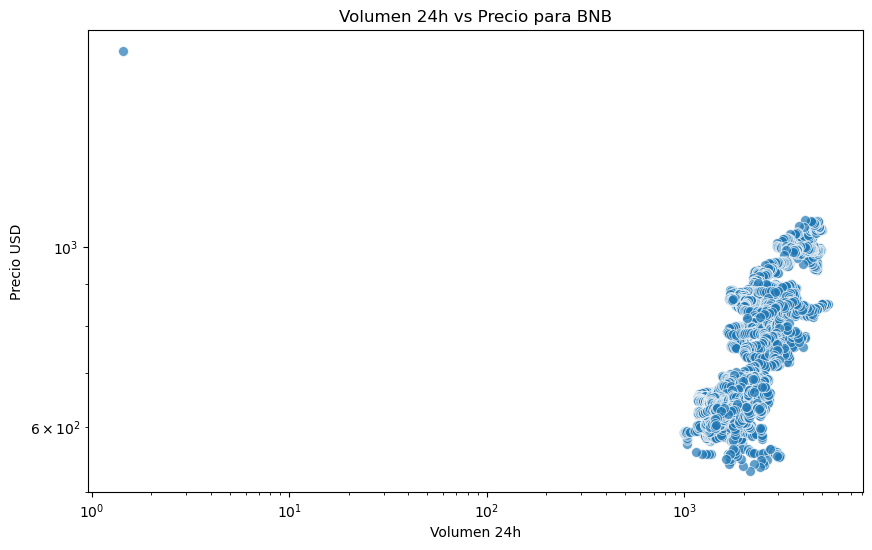

In [ ]:
coin = 'BNB' # sustituye por la moneda que quieras

df_coin = df_top5[df_top5['name'] == coin].copy()
df_coin['price_usd'] = pd.to_numeric(df_coin['price_usd'], errors='coerce')
df_coin['vol_24h'] = pd.to_numeric(df_coin['vol_24h'], errors='coerce')
df_coin = df_coin.dropna(subset=['price_usd','vol_24h'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_coin, x='vol_24h', y='price_usd', alpha=0.7, s=50, color='C0')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Volumen 24h')
plt.ylabel('Precio USD')
plt.title(f'Volumen 24h vs Precio para {coin}');


# Gráfico 4
Muestra la evolución del precio en USD a lo largo del tiempo, una línea por cada criptomoneda.
Explicación: ideal para ver tendencias y comparar comportamientos temporales entre monedas.

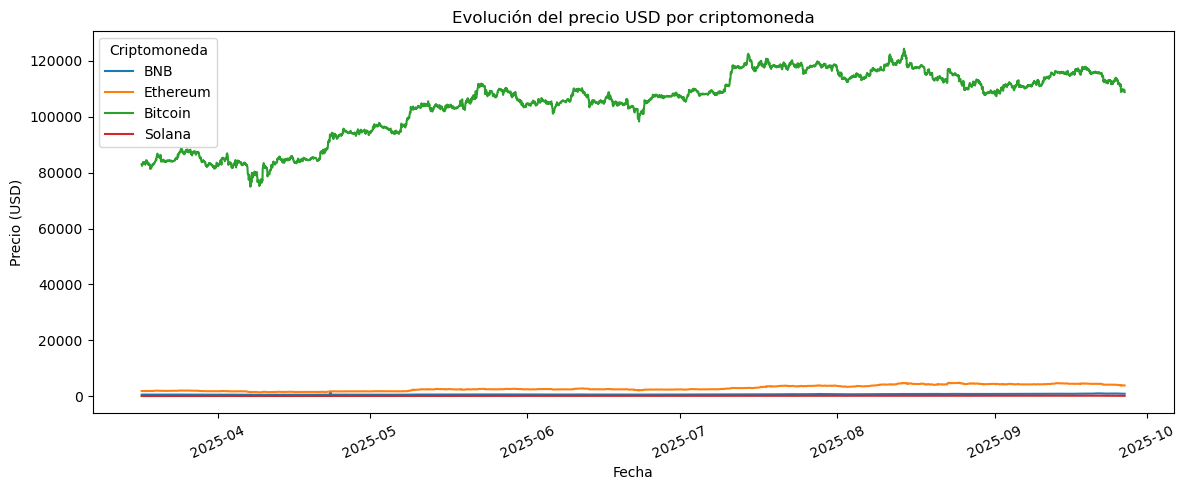

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_top5, x='timestamp', y='price_usd', hue='name', estimator=None)
plt.title('Evolución del precio USD por criptomoneda')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend(title='Criptomoneda')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

# Gráfico 5

Scatter plot: price_usd vs vol_24h (tamaño = market_cap, color = name)

Compara precio y volumen, mostrando también el tamaño de mercado.

Explicación: verás si a mayor precio suele corresponder mayor volumen y cómo influye la capitalización.

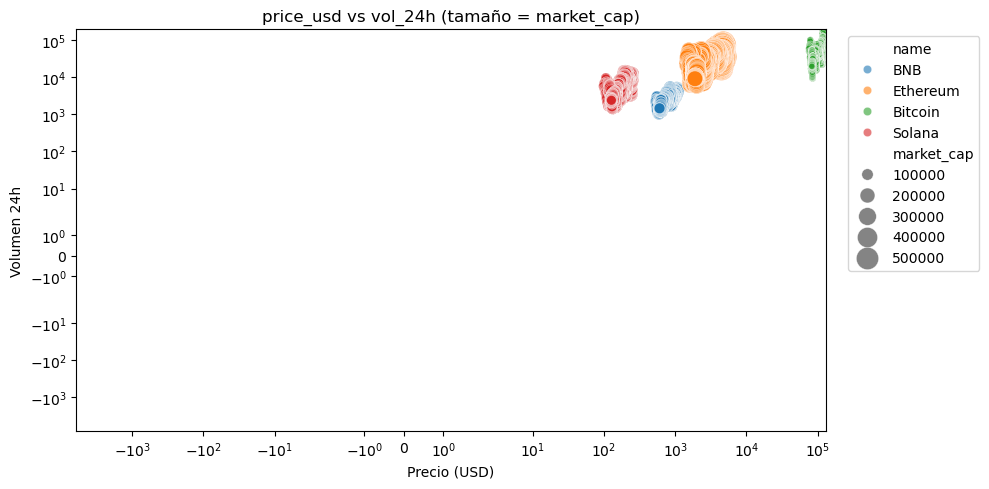

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_top5, x='price_usd', y='vol_24h', hue='name',
                size='market_cap', sizes=(20,300), alpha=0.6, legend='brief')
plt.xscale('symlog')   # si hay mucha diferencia de escala
plt.yscale('symlog')
plt.xlabel('Precio (USD)')
plt.ylabel('Volumen 24h')
plt.title('price_usd vs vol_24h (tamaño = market_cap)')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico 6

Regresión (regplot) por todas las monedas: price_usd vs market_cap (una regresión por moneda)

Ajuste lineal por criptomoneda para estudiar relación precio–cap.

Explicación: comprueba si hay relación directa entre capitalización y precio; usar log ayuda cuando hay grandes diferencias.

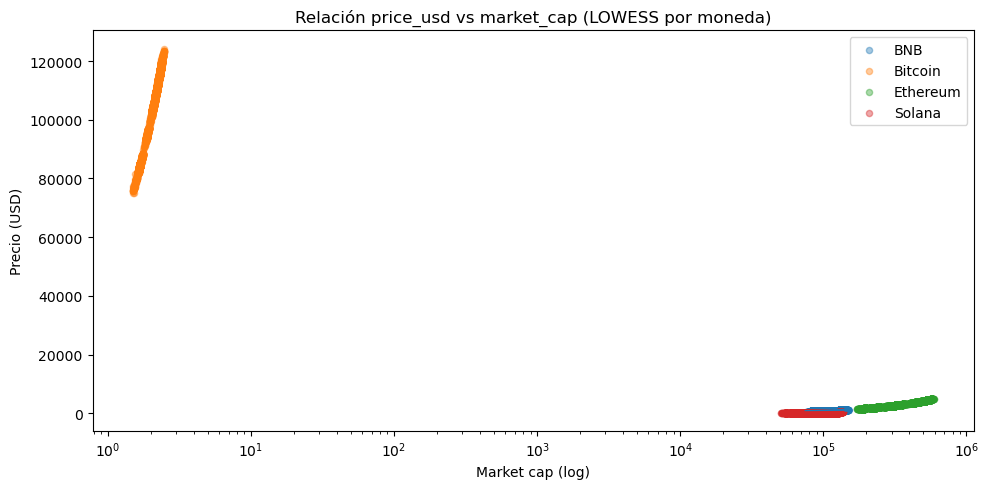

In [ ]:
plt.figure(figsize=(10,5))
for name, g in df_top5.groupby('name'):
    sns.regplot(data=g, x='market_cap', y='price_usd', lowess=True, scatter_kws={'s':20, 'alpha':0.4}, label=name)
plt.xscale('log')
plt.xlabel('Market cap (log)')
plt.ylabel('Precio (USD)')
plt.title('Relación price_usd vs market_cap (LOWESS por moneda)')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 7

Barplot: media de chg_7d por criptomoneda (ordenadas)

Compara el rendimiento semanal promedio entre monedas.

Explicación: identifica qué monedas han tendido a subir o bajar más en la última semana.

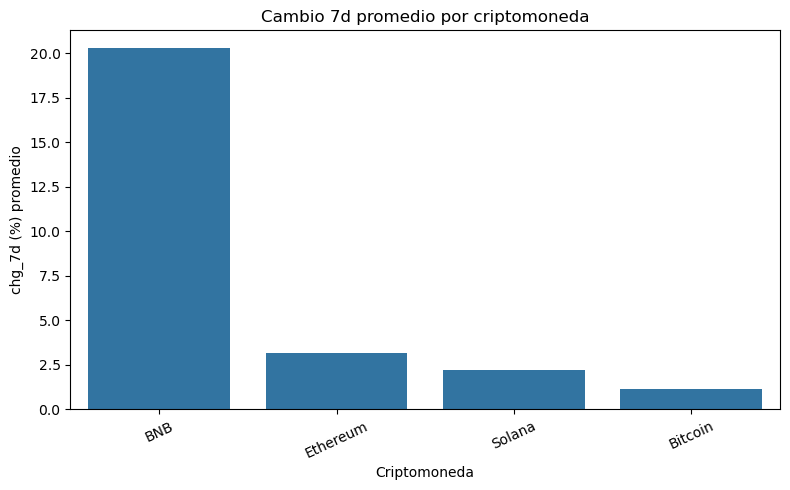

In [ ]:
plt.figure(figsize=(8,5))
order = df_top5.groupby('name')['chg_7d'].mean().sort_values(ascending=False).index
sns.barplot(data=df_top5, x='name', y='chg_7d', order=order, errorbar=None)
plt.title('Cambio 7d promedio por criptomoneda')
plt.ylabel('chg_7d (%) promedio')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

# Gráfico 8

Boxplot: vol_24h por criptomoneda (dispersión y outliers)

Distribución del volumen por moneda.

Explicación: compara la variabilidad del volumen; con symlog se manejan mejor outliers.

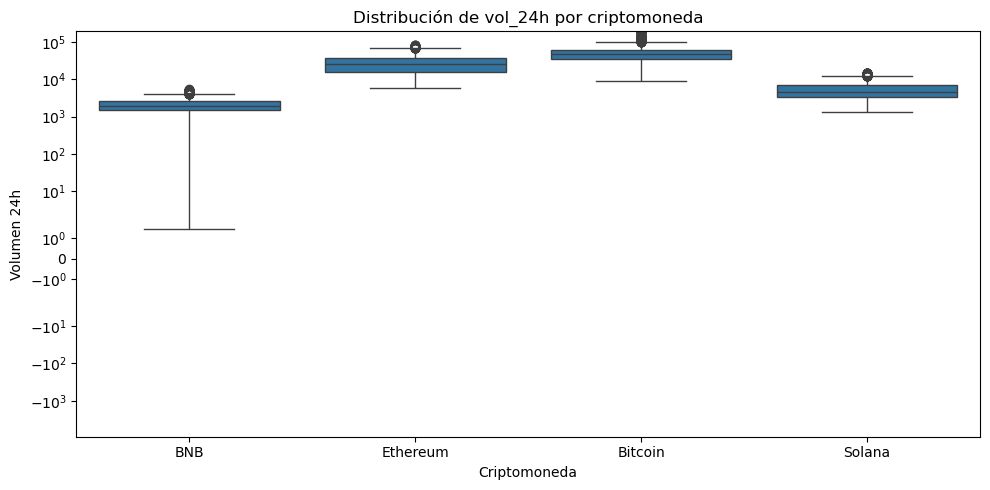

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_top5, x='name', y='vol_24h')
plt.yscale('symlog')
plt.title('Distribución de vol_24h por criptomoneda')
plt.xlabel('Criptomoneda')
plt.ylabel('Volumen 24h')
plt.tight_layout()
plt.show()

# Gráfico 9

Heatmap de correlación por moneda (variables numéricas)

Correlaciones price_usd, vol_24h, chg_24h, chg_7d, market_cap para cada moneda usando subplots.

Explicación: ver qué variables se relacionan entre sí para cada moneda individualmente.

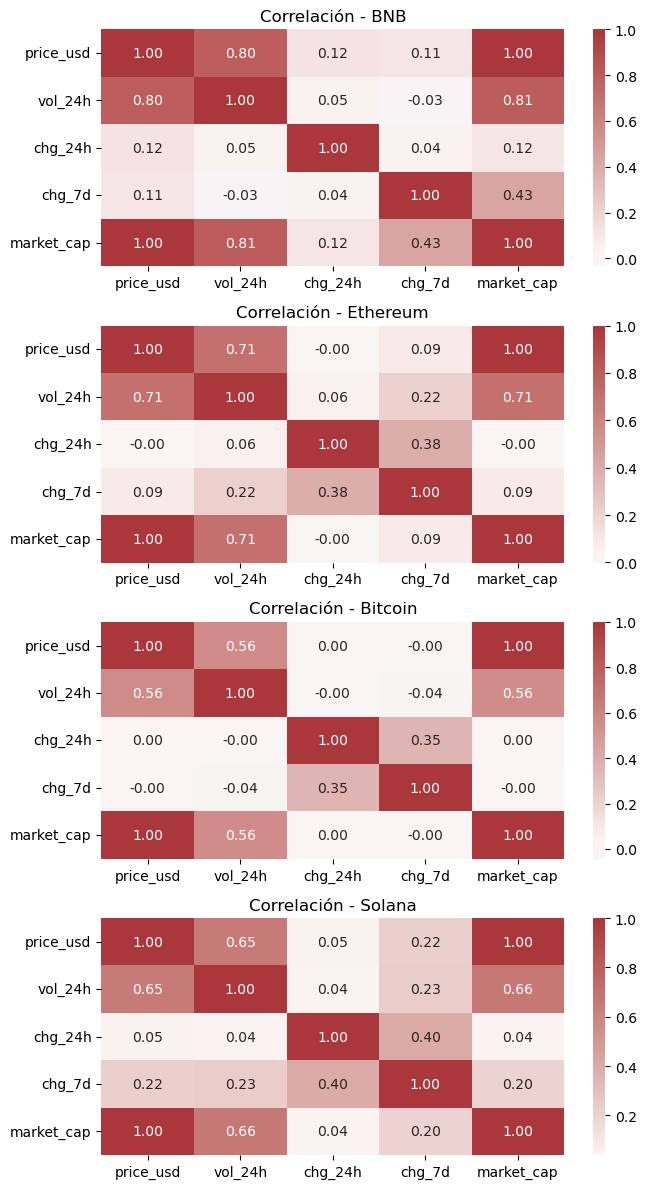

In [ ]:
num_cols = ['price_usd','vol_24h','chg_24h','chg_7d','market_cap']
names = df_top5['name'].unique()
n = len(names)
fig, axes = plt.subplots(n, 1, figsize=(7, 3*n))
if n == 1: axes = [axes]
for ax, name in zip(axes, names):
    corr = df_top5[df_top5['name']==name][num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0, ax=ax)
    ax.set_title(f'Correlación - {name}')
plt.tight_layout()
plt.show()

# Gráfico 10

ime series area (apilada) de market_cap por moneda (por fecha)

Suma la capitalización por fecha y muestra la participación relativa (stacked area).

Explicación: permite ver la evolución de la cuota de mercado de cada moneda a lo largo del tiempo.

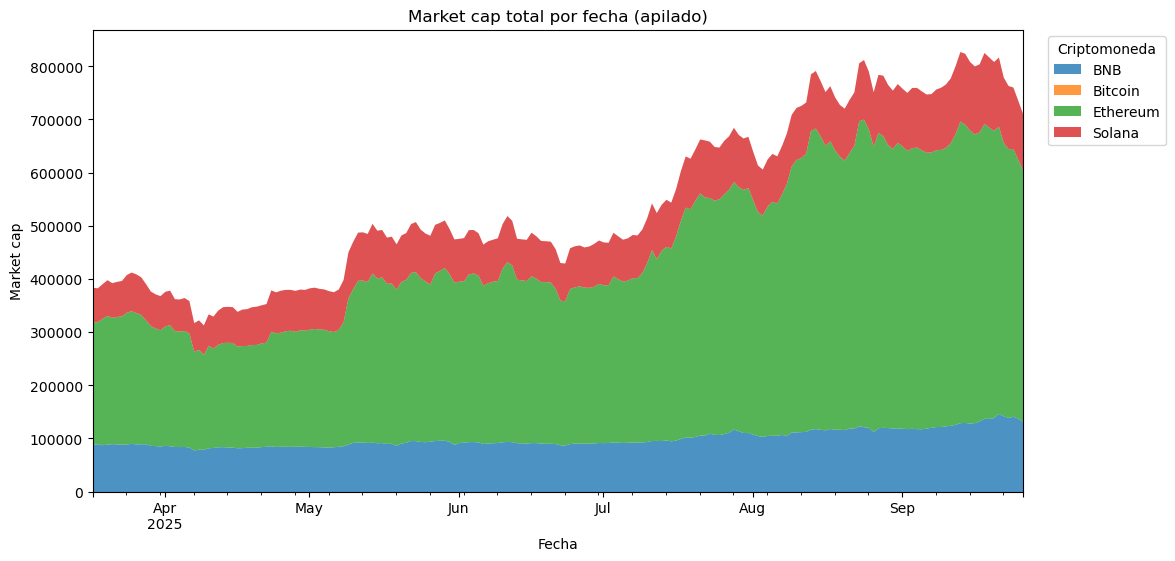

In [ ]:
# Pivotear por fecha y moneda
pivot = df_top5.pivot_table(index='timestamp', columns='name', values='market_cap', aggfunc='mean').fillna(0)
pivot_resampled = pivot.resample('D').mean().interpolate()  # agrupar por día y rellenar

pivot_resampled.plot.area(alpha=0.8, linewidth=0, figsize=(12,6))
plt.title('Market cap total por fecha (apilado)')
plt.xlabel('Fecha')
plt.ylabel('Market cap')
plt.legend(title='Criptomoneda', bbox_to_anchor=(1.02,1), loc='upper left');

# Gráfico 11

Stacked area normalizado (porcentaje del total) — ver cuota de mercado relativa

Si usas stacked area pero quieres que muestre participación relativa, normaliza por la suma total por fecha.

Cuándo: quieres mostrar cómo cambia la participación de mercado de cada moneda a lo largo del tiempo.

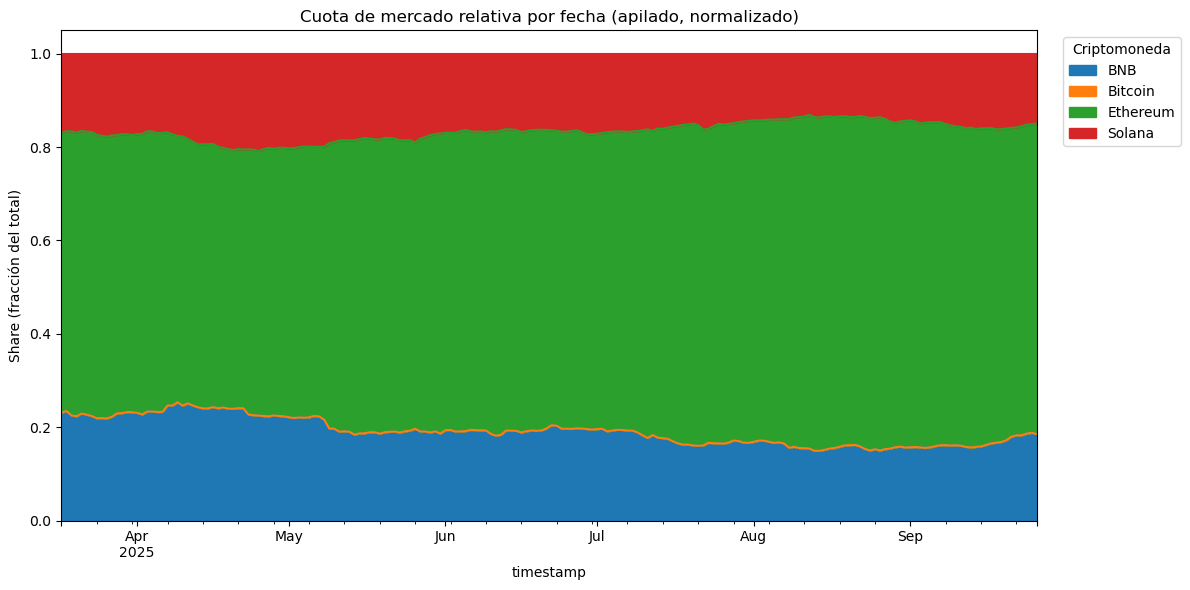

In [ ]:
pivot = df_top5.pivot_table(index='timestamp', columns='name', values='market_cap', aggfunc='mean').fillna(0)
pivot_resampled = pivot.resample('D').mean().interpolate()

pivot_pct = pivot_resampled.div(pivot_resampled.sum(axis=1), axis=0)  # cada fila suma 1
pivot_pct.plot.area(figsize=(12,6))
plt.ylabel('Share (fracción del total)')
plt.title('Cuota de mercado relativa por fecha (apilado, normalizado)')
plt.legend(title='Criptomoneda', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico 12

Swarm + Box (combinado) de chg_24h por name

Boxplot con puntos individuales superpuestos para ver la dispersión.

Explicación: combina resumen estadístico (box) con puntos reales (swarm) para ver la variabilidad y outliers.

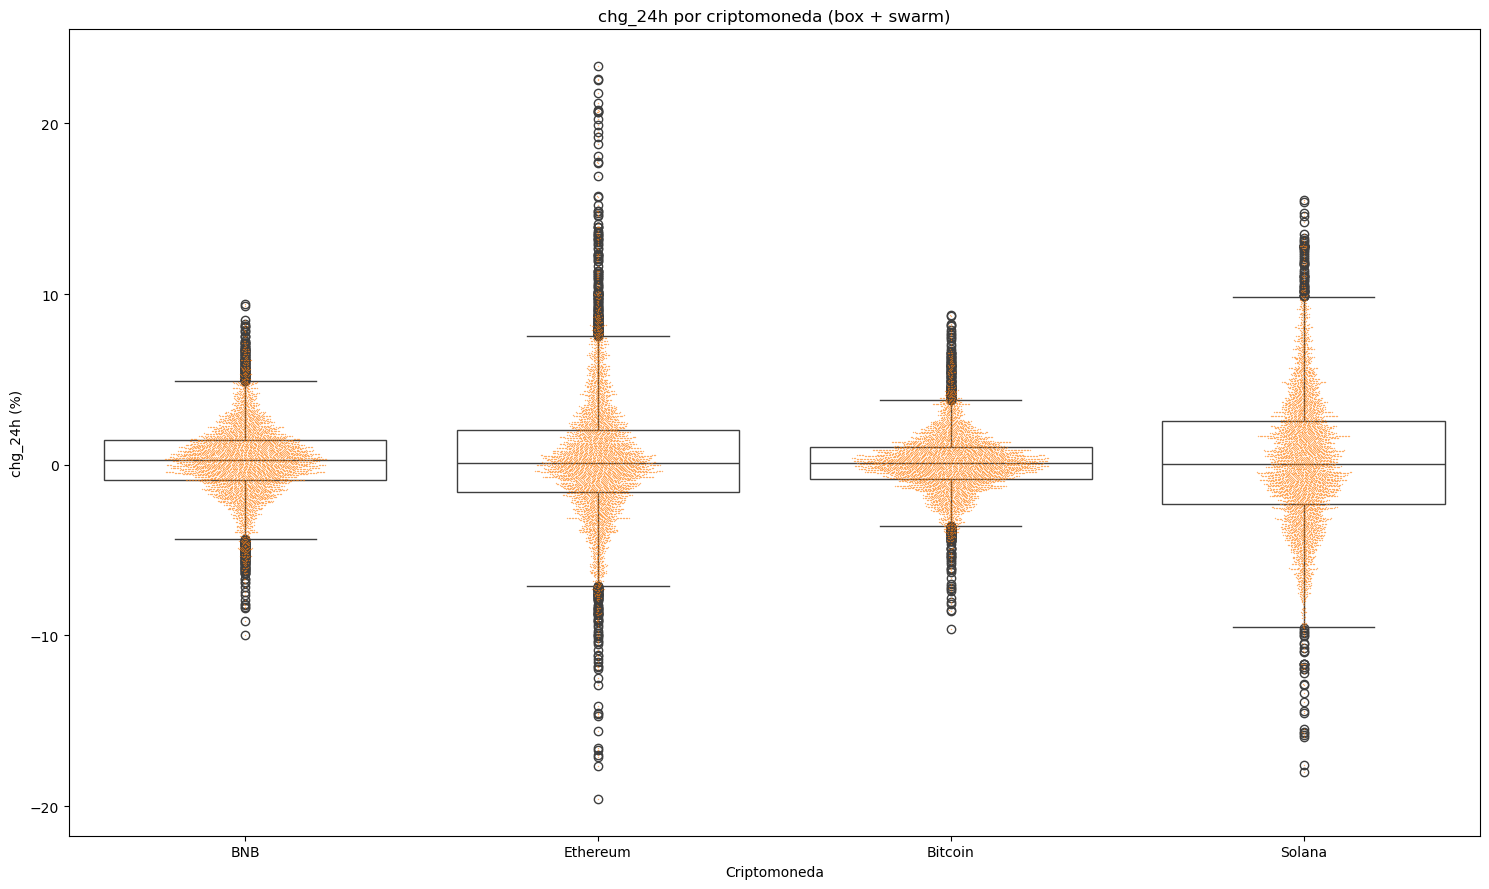

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df_top5, x='name', y='chg_24h', showcaps=True, boxprops={'facecolor':'None'})
sns.swarmplot(data=df_top5, x='name', y='chg_24h', size=1, alpha=0.6)
plt.title('chg_24h por criptomoneda (box + swarm)')
plt.xlabel('Criptomoneda')
plt.ylabel('chg_24h (%)')
plt.tight_layout()
plt.show()

# Gráfico 13

Z-score (estandarizar) para comparar variabilidad relativa

Estandariza (media 0, desviación 1) para ver movimientos relativos respecto a su media.

Cuándo: cuando te interesa comparar volatilidad o desviaciones relativas.

C:\Users\ibaig\AppData\Local\Temp\ipykernel_4648\2936594768.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot = df_top5.pivot_table(index='timestamp', columns='name', values='price_usd', aggfunc='mean').fillna(method='ffill')


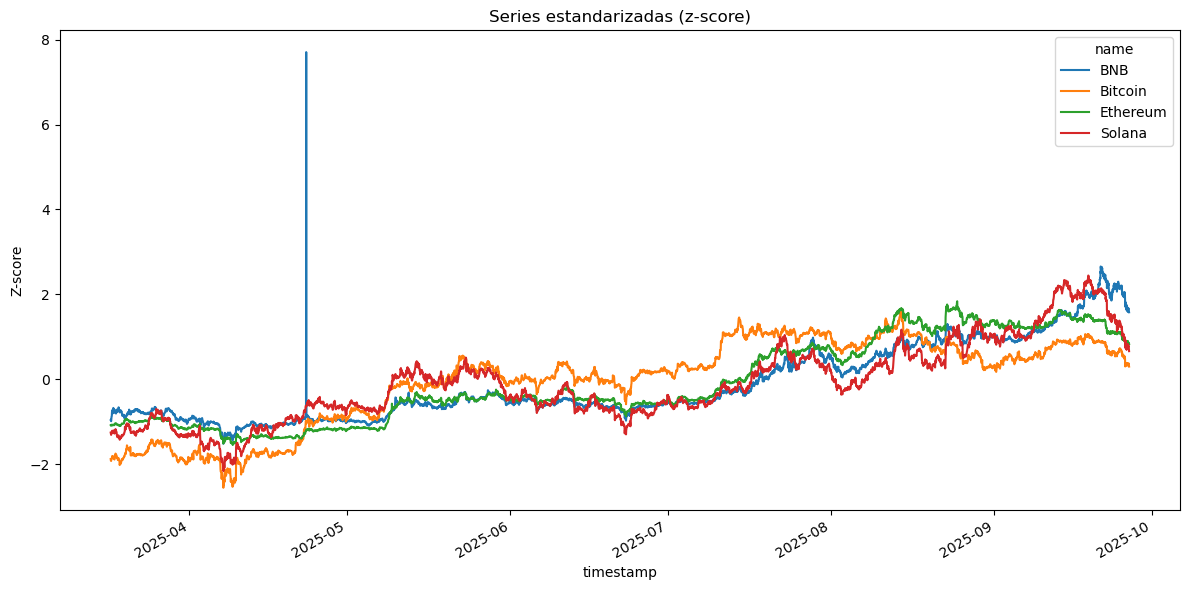

In [ ]:
pivot = df_top5.pivot_table(index='timestamp', columns='name', values='price_usd', aggfunc='mean').fillna(method='ffill')
pivot_z = (pivot - pivot.mean()) / pivot.std()
pivot_z.plot(figsize=(12,6))
plt.title('Series estandarizadas (z-score)')
plt.ylabel('Z-score')
plt.tight_layout()
plt.show()